In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
df = pd.read_csv('data/crypto-markets.csv')
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [5]:
btc = df.loc[df.symbol == 'BTC']
btc = btc[['date', 'close']]
btc

,date,close
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21
...,...,...
2037,2018-11-25,4009.97
2038,2018-11-26,3779.13
2039,2018-11-27,3820.72
2040,2018-11-28,4257.42


In [7]:
btc.index = btc.date
btc.drop('date', axis=1, inplace=True)

In [10]:
#creating train and test sets
dataset = btc.values

In [12]:
train = dataset
valid = dataset[(len(dataset)-365):,:]

In [13]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 44s - loss: 0.0016
Epoch 2/50
 - 43s - loss: 6.2732e-04
Epoch 3/50
 - 46s - loss: 5.4647e-04
Epoch 4/50
 - 45s - loss: 3.4969e-04
Epoch 5/50
 - 44s - loss: 4.5238e-04
Epoch 6/50
 - 43s - loss: 3.8470e-04
Epoch 7/50
 - 44s - loss: 3.0383e-04
Epoch 8/50
 - 44s - loss: 3.0135e-04
Epoch 9/50
 - 43s - loss: 3.0565e-04
Epoch 10/50
 - 46s - loss: 3.1301e-04
Epoch 11/50
 - 44s - loss: 3.0413e-04
Epoch 12/50
 - 44s - loss: 2.8397e-04
Epoch 13/50
 - 43s - loss: 2.2737e-04
Epoch 14/50
 - 43s - loss: 2.7809e-04
Epoch 15/50
 - 43s - loss: 2.5346e-04
Epoch 16/50
 - 44s - loss: 2.9442e-04
Epoch 17/50
 - 46s - loss: 2.6710e-04
Epoch 18/50
 - 44s - loss: 2.3315e-04
Epoch 19/50
 - 45s - loss: 2.5379e-04
Epoch 20/50
 - 44s - loss: 2.1489e-04
Epoch 21/50
 - 43s - loss: 2.5715e-04
Epoch 22/50
 - 43s - loss: 2.6955e-04
Epoch 23/50
 - 44s - loss: 2.3526e-04
Epoch 24/50
 - 46s - loss: 2.4093e-04
Epoch 25/50
 - 44s - loss: 2.4736e-04
Epoch 26/50
 - 44s - loss: 2.2763e-04
Epoch 27/50
 - 44s - loss

In [17]:
# Test predictions
inputs = btc[len(btc) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


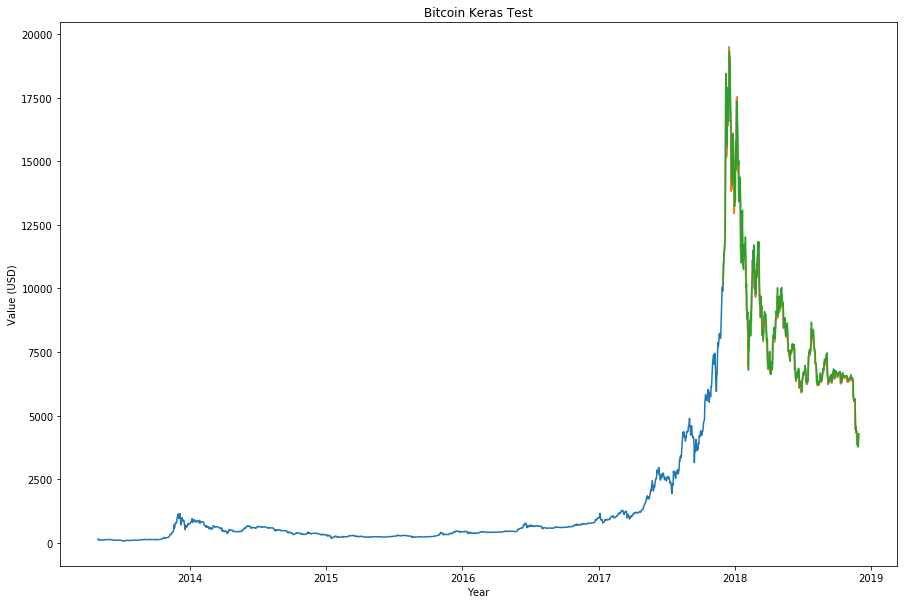

In [32]:
train = btc
valid = btc[(len(dataset)-365):]
valid['Predictions'] = closing_price

plt.figure(figsize=(15,10))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.title('Bitcoin Keras Test')
plt.xlabel('Year')
plt.ylabel('Value (USD)')
plt.savefig('images/btc_keras_test.png')
plt.show()